# i590 Final Report (GapMinder): Jessica Johnson

This report is an analysis of Gapminder data which consists of 41285 observations with 6 variables.
Country, population and region are objects; Year is an integer; and life and income are floats.
Population and Income variables have missing values. 

Analysis of range and disperity of integer and float variables:
Year: range is from 1800 - 2015 
Life: range is from 1 to 84 with 50% of the observations below 35 which is below the mean of 42. This shows the data skews towards younger people
Income: range is from 142 to 182,668 with 75% of values being below the mean of 4570, showing that the upper income value is an outlier

For preprocessing, values need to be imputed for population, income and region. There will also be a potential need to remove outliers.

It would be interesting to see if the region or population a person lives in determines their income.

In [137]:
#import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
%matplotlib inline

#import data
df = pd.read_csv("C:/Users/hp/Downloads/gapminder.csv")
#add index
df=df.iloc[:, 1:]
#get summary information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 5 columns):
Year          41284 non-null int64
life          41284 non-null float64
population    15467 non-null object
income        38943 non-null float64
region        41284 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [83]:
#obtain statistical information on numerical variables
print(df.Year.describe())
print(df.life.describe())
print(df.income.describe())

count    41284.000000
mean      1907.462504
std         62.241440
min       1800.000000
25%       1854.000000
50%       1908.000000
75%       1962.000000
max       2015.000000
Name: Year, dtype: float64
count    41284.000000
mean        42.884766
std         16.220812
min          1.000000
25%         31.000000
50%         35.118539
75%         55.600000
max         84.100000
Name: life, dtype: float64
count     38943.000000
mean       4570.795214
std       10096.543747
min         142.000000
25%         883.000000
50%        1450.000000
75%        3483.000000
max      182668.000000
Name: income, dtype: float64


In [115]:
#Change categorical variable to numeric
lb_make = LabelEncoder()
df['region'] = lb_make.fit_transform(df['region'])

In [120]:
#drop null values
df.dropna()

,Year,life,population,income,region
0,1800,28.211000,3280000,603.0,4
1,1801,28.200753,NaN,603.0,4
2,1802,28.190507,NaN,603.0,4
3,1803,28.180260,NaN,603.0,4
4,1804,28.170013,NaN,603.0,4


[Text(0.5,0,'Year'), Text(1.5,0,'life'), Text(2.5,0,'income')]

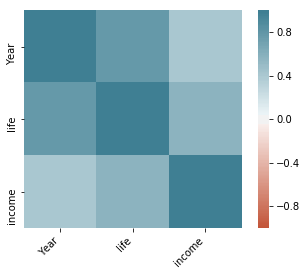

In [8]:
#Graph showing correlation
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

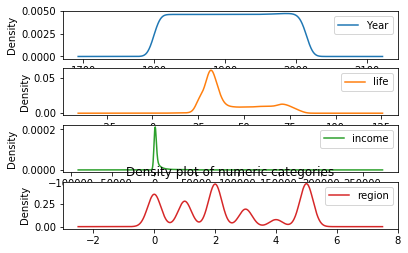

In [136]:
#Density plot of numeric values
df.plot(kind = 'density', subplots = True, sharex=False)
plt.title('Density plot of numeric categories')
plt.show()

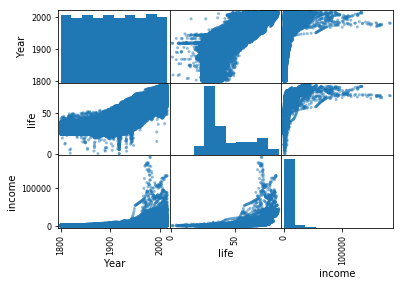

In [24]:
#Scatter matrix
scatter_matrix(df)
plt.title('Scatter matrix of variables')
plt.show()

In [127]:
#Linear regression: create dependent and independent variables 
y = df.region
X = df.life

0    28.211000
1    28.200753
2    28.190507
3    28.180260
4    28.170013
Name: life, dtype: float64

In [129]:
#reshape X and y
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [130]:
# Create the regression model
reg = linear_model.LinearRegression()

In [131]:
#Create prediction variable
pred = np.linspace(min(X), max(X)).reshape(-1,1)

In [138]:
# Fit and summarize OLS model
mod = sm.OLS(y, X)
regfit = mod.fit()
print(regfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                 4.236e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        03:04:37   Log-Likelihood:                -89748.
No. Observations:               41284   AIC:                         1.795e+05
Df Residuals:                   41283   BIC:                         1.795e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0470      0.000    205.805      0.0

Summary table shows that there isn't a significant relationship between the x and y variables as the r2 figure is low.

In [133]:
#Compute predictions over y_pred
y_pred = reg.predict(pred)

In [134]:
#print r2 score
print(reg.score(X, y))

0.02751082038641095


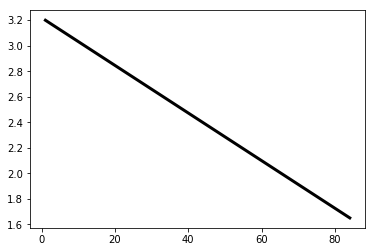

In [135]:
# Plot regression line
plt.plot(pred, y_pred, color='black', linewidth=3)
plt.show()